# Via Lame traffic analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Or, to specifically disable the SettingWithCopyWarning
warnings.filterwarnings("ignore", category=UserWarning, message=".*SettingWithCopyWarning.*")

In [2]:
# Loading the file
file = 'varco-n-55-lame-direzione-centro.csv'
df = pd.read_csv(file, sep=";")

print('The dataframe has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataframe has 205138 rows and 19 columns


In [3]:
df.describe() # Data Description

,Varco,Totale passaggi,Non Classificato,Moto/Ciclomotori,Auto/Furgoni,Bus/Camion,Sintatticamente Corretta,Lista Bianca fuori fascia,Lista bianca regolare,Lista speciale,Lista Nera,Transito generico irregolare,Segnalazioni
count,205138.0,205138.000000,205138.0,205138.000000,205138.000000,205138.000000,205138.0,205138.0,205138.000000,205138.0,205138.0,205138.000000,205138.0
mean,55.0,2.724400,0.0,0.046305,1.709907,0.968187,0.0,0.0,2.187693,0.0,0.0,0.034981,0.0
std,0.0,2.787957,0.0,0.243761,1.995307,1.218918,0.0,0.0,2.354652,0.0,0.0,0.763257,0.0
min,55.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
25%,55.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
50%,55.0,2.000000,0.0,0.000000,1.000000,1.000000,0.0,0.0,2.000000,0.0,0.0,0.000000,0.0
75%,55.0,4.000000,0.0,0.000000,3.000000,2.000000,0.0,0.0,4.000000,0.0,0.0,0.000000,0.0
max,55.0,79.000000,0.0,12.000000,60.000000,55.000000,0.0,0.0,19.000000,0.0,0.0,78.000000,0.0


No datas are missing as the number of instance count is the same for all the attributes

In [4]:
df.head(2) 
print('First Measure: {}'.format(df.iloc[0]['Data']))

First Measure: 2019-04-28T14:00:00+02:00


In [5]:
df.tail(2)
print('First Measure: {}'.format(df.iloc[-1]['Data']))

First Measure: 2025-01-31T23:45:00+01:00


In [6]:
# Dropping Anyway, can be useful 
df.dropna(inplace=True)

In [7]:
# Only selecting Hours in order to understand the most busy hours
data = df[['Data', 'Totale passaggi']]

In [8]:
data

,Data,Totale passaggi
0,2019-04-28T14:00:00+02:00,2
1,2019-04-28T14:45:00+02:00,1
2,2019-04-28T15:00:00+02:00,3
3,2019-04-28T15:15:00+02:00,1
4,2019-04-28T16:00:00+02:00,1
...,...,...
205133,2025-01-31T20:00:00+01:00,5
205134,2025-01-31T21:45:00+01:00,4
205135,2025-01-31T23:00:00+01:00,2
205136,2025-01-31T23:15:00+01:00,3


In [9]:
# Converting the Date's strings into Datetime format to extract the hours
data['Data'] = pd.to_datetime(data['Data'], utc=True)

In [10]:
data.dtypes

Data               datetime64[ns, UTC]
Totale passaggi                  int64
dtype: object

In [11]:
# Extracting hours
hoursdata = pd.DataFrame(columns=[])
hoursdata['Hours'] = data['Data'].dt.hour
hoursdata['Totale passaggi'] = data['Totale passaggi']

In [12]:
hoursdata

,Hours,Totale passaggi
0,12,2
1,12,1
2,13,3
3,13,1
4,14,1
...,...,...
205133,19,5
205134,20,4
205135,22,2
205136,22,3


Now I created two arrays, the first contains the total amount of vehicles that passed through Via Lame totally among the years of relevation

The second is necessary to understand which is the median value of vehicles passing each day through Via Lame

In [13]:
# 
grouped_hour_data = hoursdata.groupby('Hours')['Totale passaggi'].sum().reset_index()

# Group by hour and calculate the median of 'Totale passaggi'
median_hour_data = hoursdata.groupby('Hours')['Totale passaggi'].median().reset_index()

In [14]:
grouped_hour_data.head(2)

,Hours,Totale passaggi
0,0,4269
1,1,2885


In [15]:
median_hour_data.head(2)

,Hours,Totale passaggi
0,0,0.0
1,1,0.0


This values go from 2019-04-28T14:00:00+02:00 to 2025-01-31T23:45:00+01:00


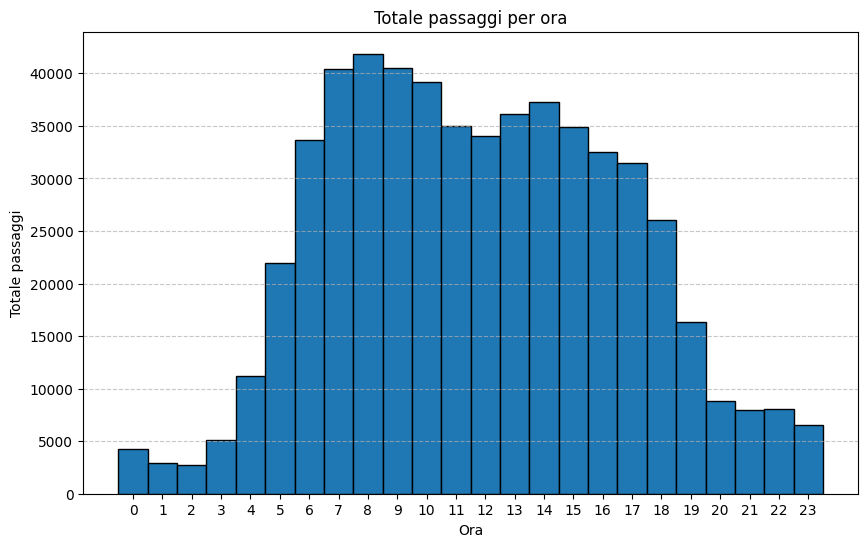

In [16]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(grouped_hour_data['Hours'], grouped_hour_data['Totale passaggi'], width=1, edgecolor='black')

# Print
print('This values go from 2019-04-28T14:00:00+02:00 to 2025-01-31T23:45:00+01:00')

# Customize the plot
plt.title('Totale passaggi per ora')
plt.xlabel('Ora')
plt.ylabel('Totale passaggi')
plt.xticks(range(24))  # To display all hours (0-23)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This values go from 2019-04-28T14:00:00+02:00 to 2025-01-31T23:45:00+01:00


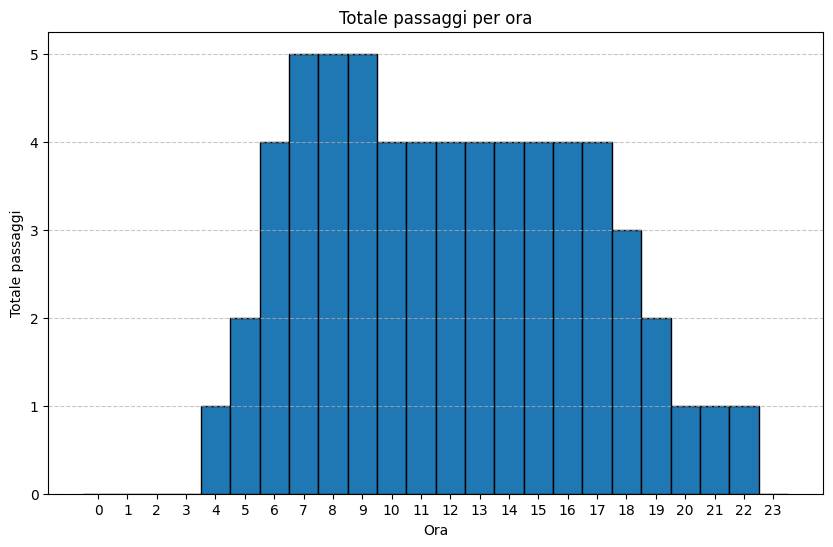

In [17]:
### Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(median_hour_data['Hours'], median_hour_data['Totale passaggi'], width=1, edgecolor='black')

# Print
print('This values go from 2019-04-28T14:00:00+02:00 to 2025-01-31T23:45:00+01:00')

# Customize the plot
plt.title('Totale passaggi per ora')
plt.xlabel('Ora')
plt.ylabel('Totale passaggi')
plt.xticks(range(24))  # To display all hours (0-23)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Now let's repeat the analysis but considering each month

In [18]:
# Create an empty DataFrame with no predefined columns
monthdata = pd.DataFrame()

# Assign 'Data' and 'Totale passaggi' from 'data' to 'monthdata'
monthdata[['Data', 'Totale passaggi']] = data[['Data', 'Totale passaggi']]

# Display the new DataFrame
#print(monthdata)

# Convert 'Data' to datetime if it's not already
monthdata['Data'] = pd.to_datetime(monthdata['Data'])

# Extract the month from the 'Data' column
monthdata['Month'] = monthdata['Data'].dt.month

monthly_data = monthdata.groupby('Month')['Totale passaggi'].sum().reset_index()


# Display the updated DataFrame
monthly_data


,Month,Totale passaggi
0,1,54522
1,2,49925
2,3,52964
3,4,43658
4,5,43820
5,6,43130
6,7,41817
7,8,31389
8,9,55768
9,10,48450


This values go from 2019-04-28T14:00:00+02:00 to 2025-01-31T23:45:00+01:00


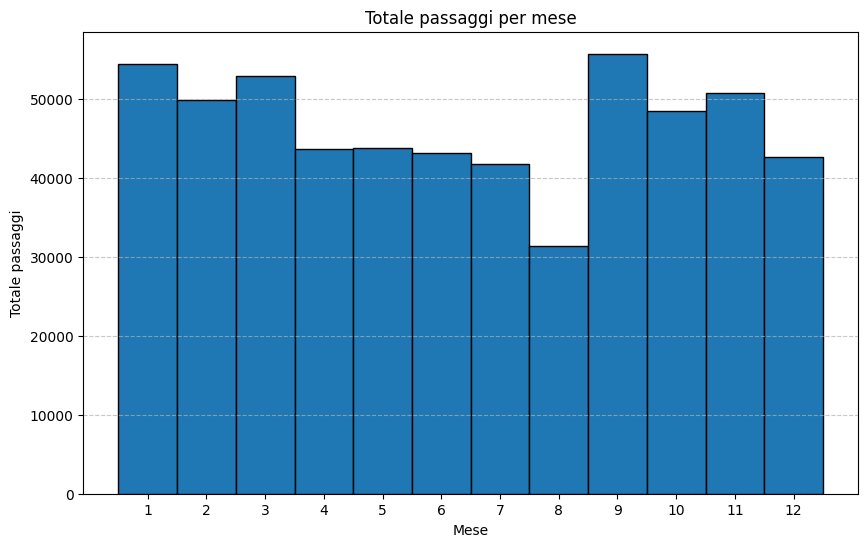

In [19]:
# 
grouped_month_data = monthly_data.groupby('Month')['Totale passaggi'].sum().reset_index()
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(grouped_month_data['Month'], grouped_month_data['Totale passaggi'], width=1, edgecolor='black')

# Print
print('This values go from 2019-04-28T14:00:00+02:00 to 2025-01-31T23:45:00+01:00')

# Customize the plot
plt.title('Totale passaggi per mese')
plt.xlabel('Mese')
plt.ylabel('Totale passaggi')
plt.xticks(range(1, 13))  # To display all month (1-12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()




In [20]:
data['Data'].dt.year
n_year = data.iloc[-1]['Data'].year - data.iloc[0]['Data'].year
print(n_year)

6


In [21]:
# Group by hour and calculate the median of 'Totale passaggi'
medium_value_month_data = grouped_month_data
medium_value_month_data['Totale passaggi']= medium_value_month_data['Totale passaggi']/n_year

medium_value_month_data

,Month,Totale passaggi
0,1,9087.000000
1,2,8320.833333
2,3,8827.333333
3,4,7276.333333
4,5,7303.333333
5,6,7188.333333
6,7,6969.500000
7,8,5231.500000
8,9,9294.666667
9,10,8075.000000


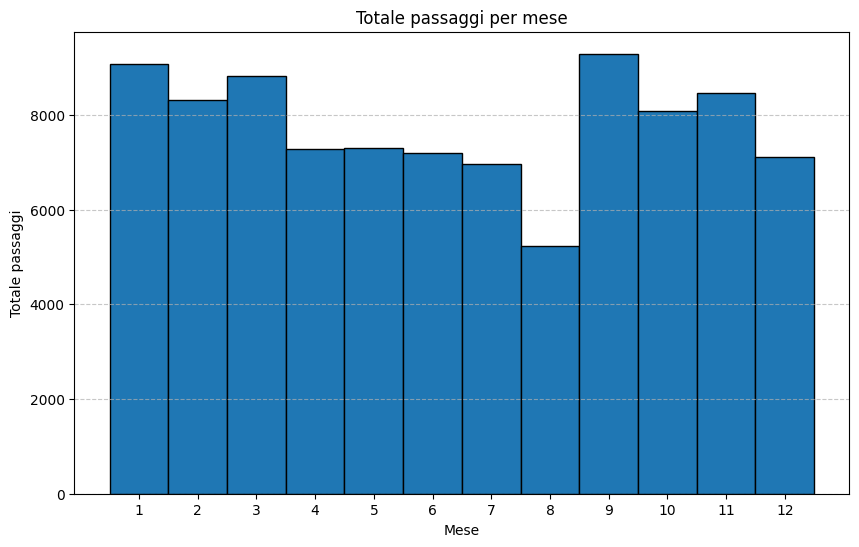

In [22]:


plt.figure(figsize=(10, 6))
plt.bar(medium_value_month_data['Month'], medium_value_month_data['Totale passaggi'], width=1, edgecolor='black')

# Customize the plot
plt.title('Totale passaggi per mese')
plt.xlabel('Mese')
plt.ylabel('Totale passaggi')
plt.xticks(range(1, 13))  # To display all month (1-12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [23]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Popup, Polyline, Marker
from ipywidgets import HTML

m = Map(
    basemap=basemap_to_tiles(basemaps.OpenTopoMap, "2017-04-08"),
    center=(44.5003, 11.3345),
    zoom=15,
    close_popup_on_click = False
)

start_via_lame=(44.50237, 11.33329)
end_via_lame=(44.496556, 11.337333)

m.add(Marker(location=start_via_lame))  # Porta delle Lame (start)
m.add(Marker(location=end_via_lame))    # Via Riva di Reno (end)

end_lame_message = HTML()
end_lame_message.value = "End of via Lame"
start_lame_message = HTML()
start_lame_message.value = "Start of of via Lame"

popup_end_via_lame = Popup(
    location = end_via_lame,
    child=end_lame_message,
    close_button=False,
    auto_close=False,
    close_on_escape_key = False
)


popup_start_via_lame = Popup(
    location = start_via_lame,
    child=start_lame_message,
    close_button=False,
    auto_close=False,
    close_on_escape_key = False
)

line = Polyline(
    locations = [start_via_lame, end_via_lame],
    color = "green",
    fill = True)

m.add(popup_start_via_lame)
m.add(popup_end_via_lame)
m.add(line)

Map(center=[44.5003, 11.3345], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in…